# **Department of Computing**

## **CS 471: Machine Learning (3+1)**

**Class**: BSCS 12  
**Lab 6**: Decision Tree


**Instructor**: Dr. Naseer Bajwa  
**Lab Engineer**: Mam Iram Tariq Bhatti

#**Understanding Decision Trees**

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
# Load the data into a pandas DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
# Preview the data
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


In [6]:
X = df.drop('species', axis=1)
y = df['species']
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=3)
# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3)

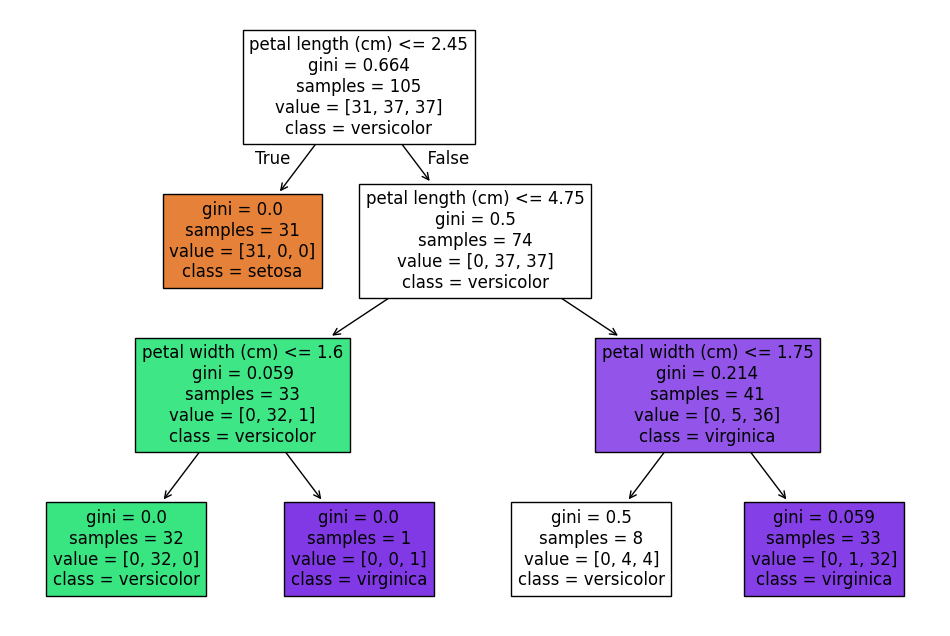

In [8]:
plt.figure(figsize=(12,8))
tree.plot_tree(clf, filled=True, feature_names=iris.feature_names,
class_names=iris.target_names)
plt.show()

In [9]:
# Make predictions
y_pred = clf.predict(X_test)
# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 100.00%


In [10]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=4)

In [11]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_split=4)
clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=3, min_samples_split=4)

#**Mini Challenge**

# Downloading the Dataset

Go to your Kaggle account and create an API token by navigating to Account Settings.
Download the kaggle.json file, which contains your Kaggle API credentials.
Put that json file in the code cell below. It will automatically download the dataset.

In [11]:
!pip install kaggle
from google.colab import files
files.upload()  # Upload the kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c titanic
!unzip titanic.zip

Saving kaggle.json to kaggle (3).json
titanic.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  titanic.zip
  inflating: gender_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


#**1. Dealing with Train Dataset**

In [12]:
import pandas as pd

# Load the train.csv file
df_train = pd.read_csv('train.csv')

# Preview the data
print(df_train.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


# EDA

In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


<Axes: xlabel='Survived'>

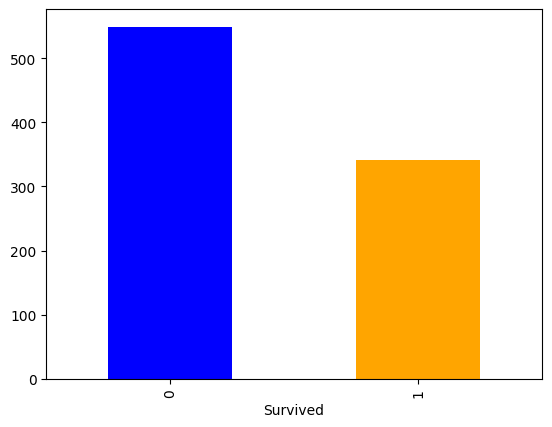

In [17]:

df_train['Survived'].value_counts().plot(kind='bar', color=['blue', 'orange'])


# Mapping of Categorical Variables

In [18]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in df_train.columns:
    if df_train[column].dtype == 'object':  # Check if the column is non-numeric
        # Apply LabelEncoder to the column
        df_train[column] = label_encoder.fit_transform(df_train[column])

# Preview the DataFrame
print(df_train.head())


   PassengerId  Survived  Pclass  Name  Sex   Age  SibSp  Parch  Ticket  \
0            1         0       3   108    1  22.0      1      0     523   
1            2         1       1   190    0  38.0      1      0     596   
2            3         1       3   353    0  26.0      0      0     669   
3            4         1       1   272    0  35.0      1      0      49   
4            5         0       3    15    1  35.0      0      0     472   

      Fare  Cabin  Embarked  
0   7.2500    147         2  
1  71.2833     81         0  
2   7.9250    147         2  
3  53.1000     55         2  
4   8.0500    147         2  


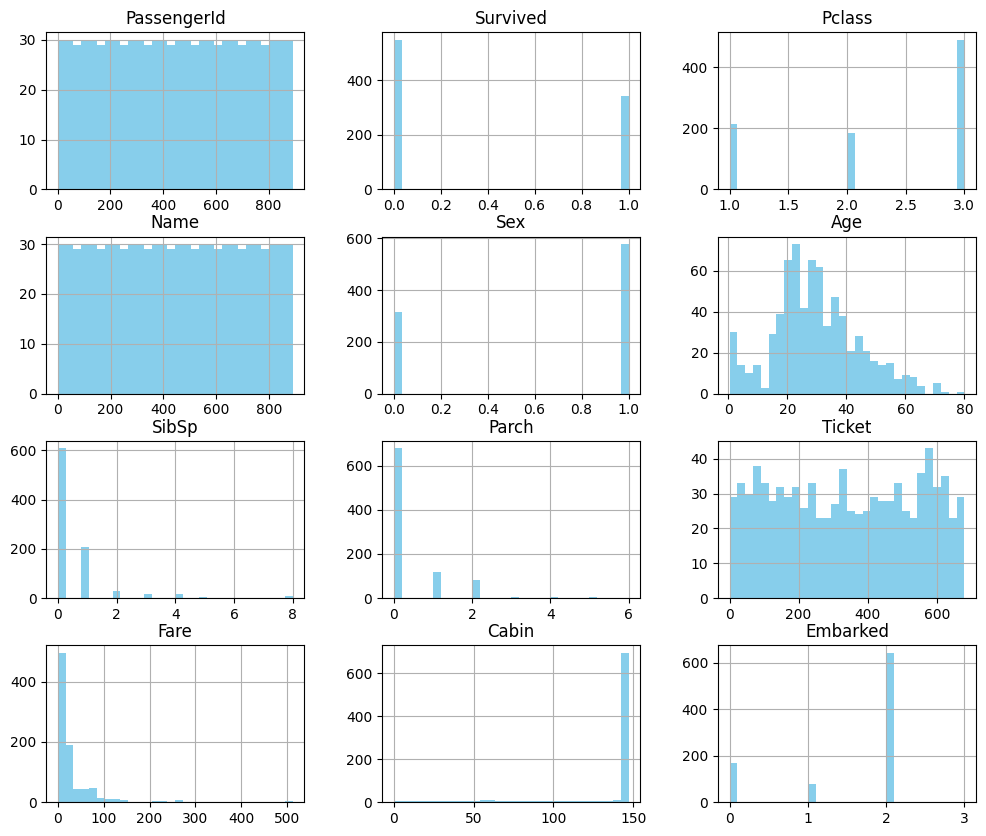

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot histograms of all features
df_train.hist(figsize=(12, 10), bins=30, color='skyblue')
plt.show()

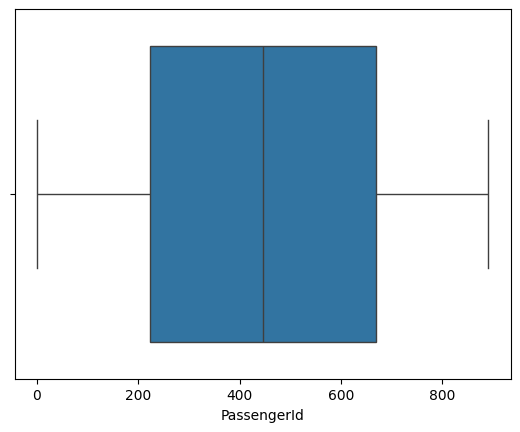

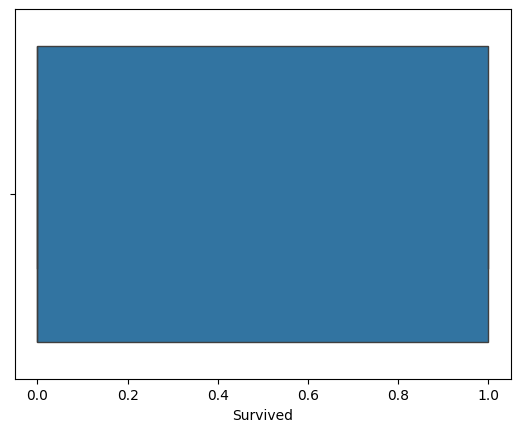

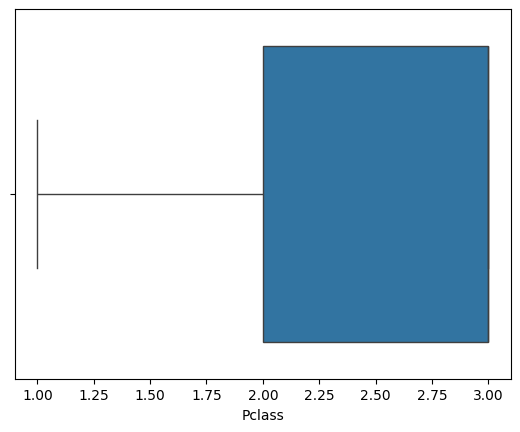

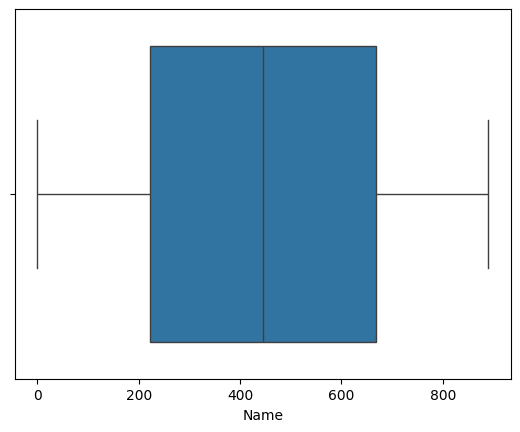

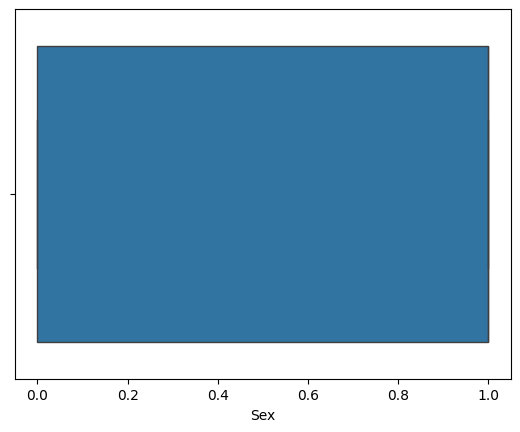

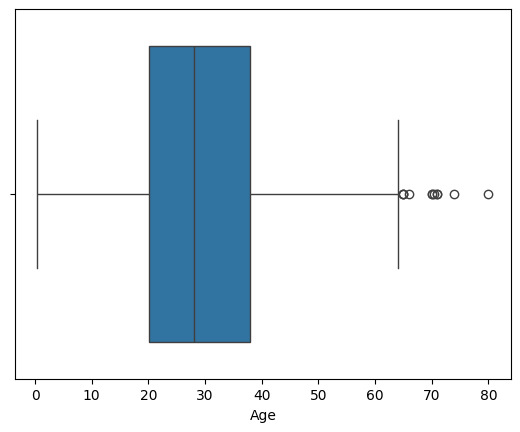

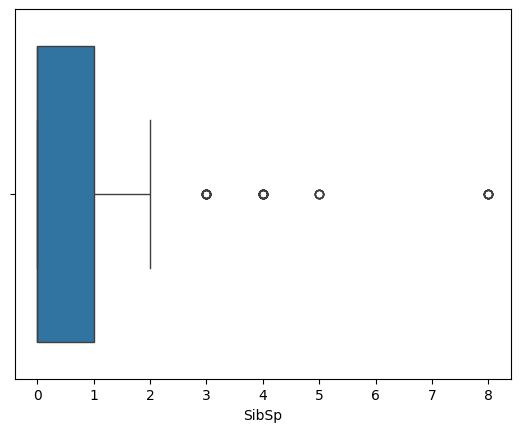

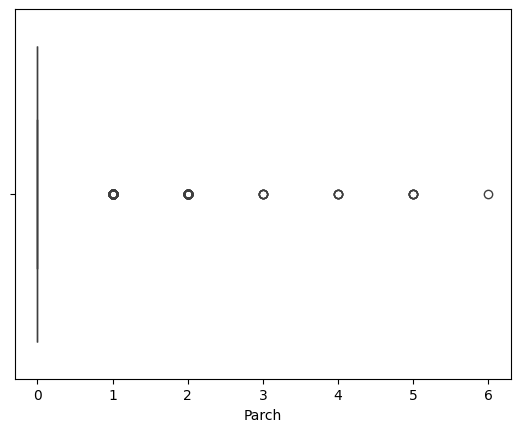

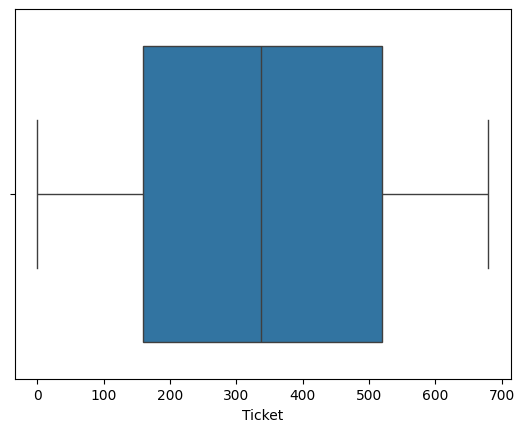

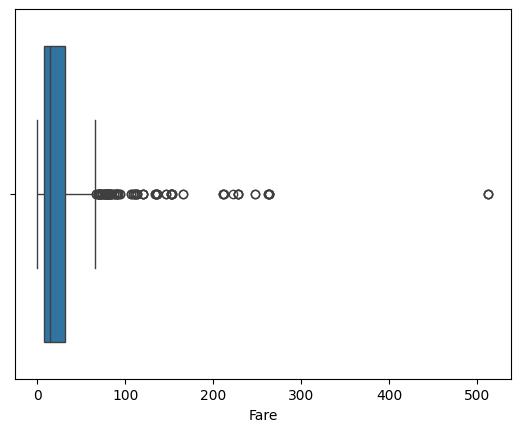

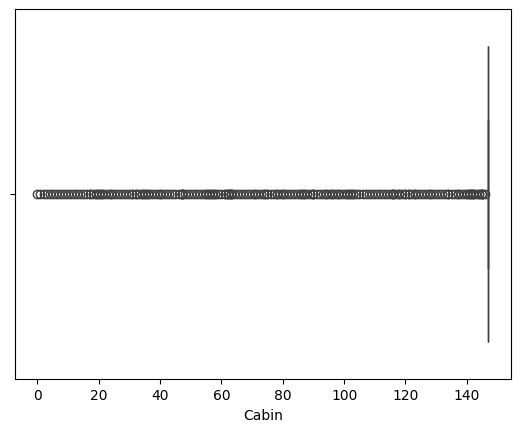

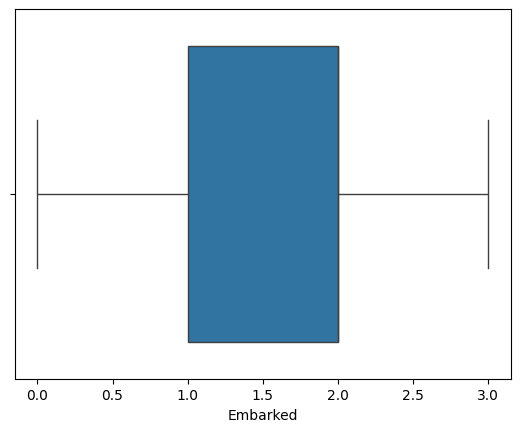

In [20]:
sns.boxplot(x='PassengerId', data=df_train)
plt.show()
sns.boxplot(x='Survived', data=df_train)
plt.show()
sns.boxplot(x='Pclass', data=df_train)
plt.show()
sns.boxplot(x='Name', data=df_train)
plt.show()
sns.boxplot(x='Sex', data=df_train)
plt.show()
sns.boxplot(x='Age', data=df_train)
plt.show()
sns.boxplot(x='SibSp', data=df_train)
plt.show()
sns.boxplot(x='Parch', data=df_train)
plt.show()
sns.boxplot(x='Ticket', data=df_train)
plt.show()
sns.boxplot(x='Fare', data=df_train)
plt.show()
sns.boxplot(x='Cabin', data=df_train)
plt.show()
sns.boxplot(x='Embarked', data=df_train)
plt.show()

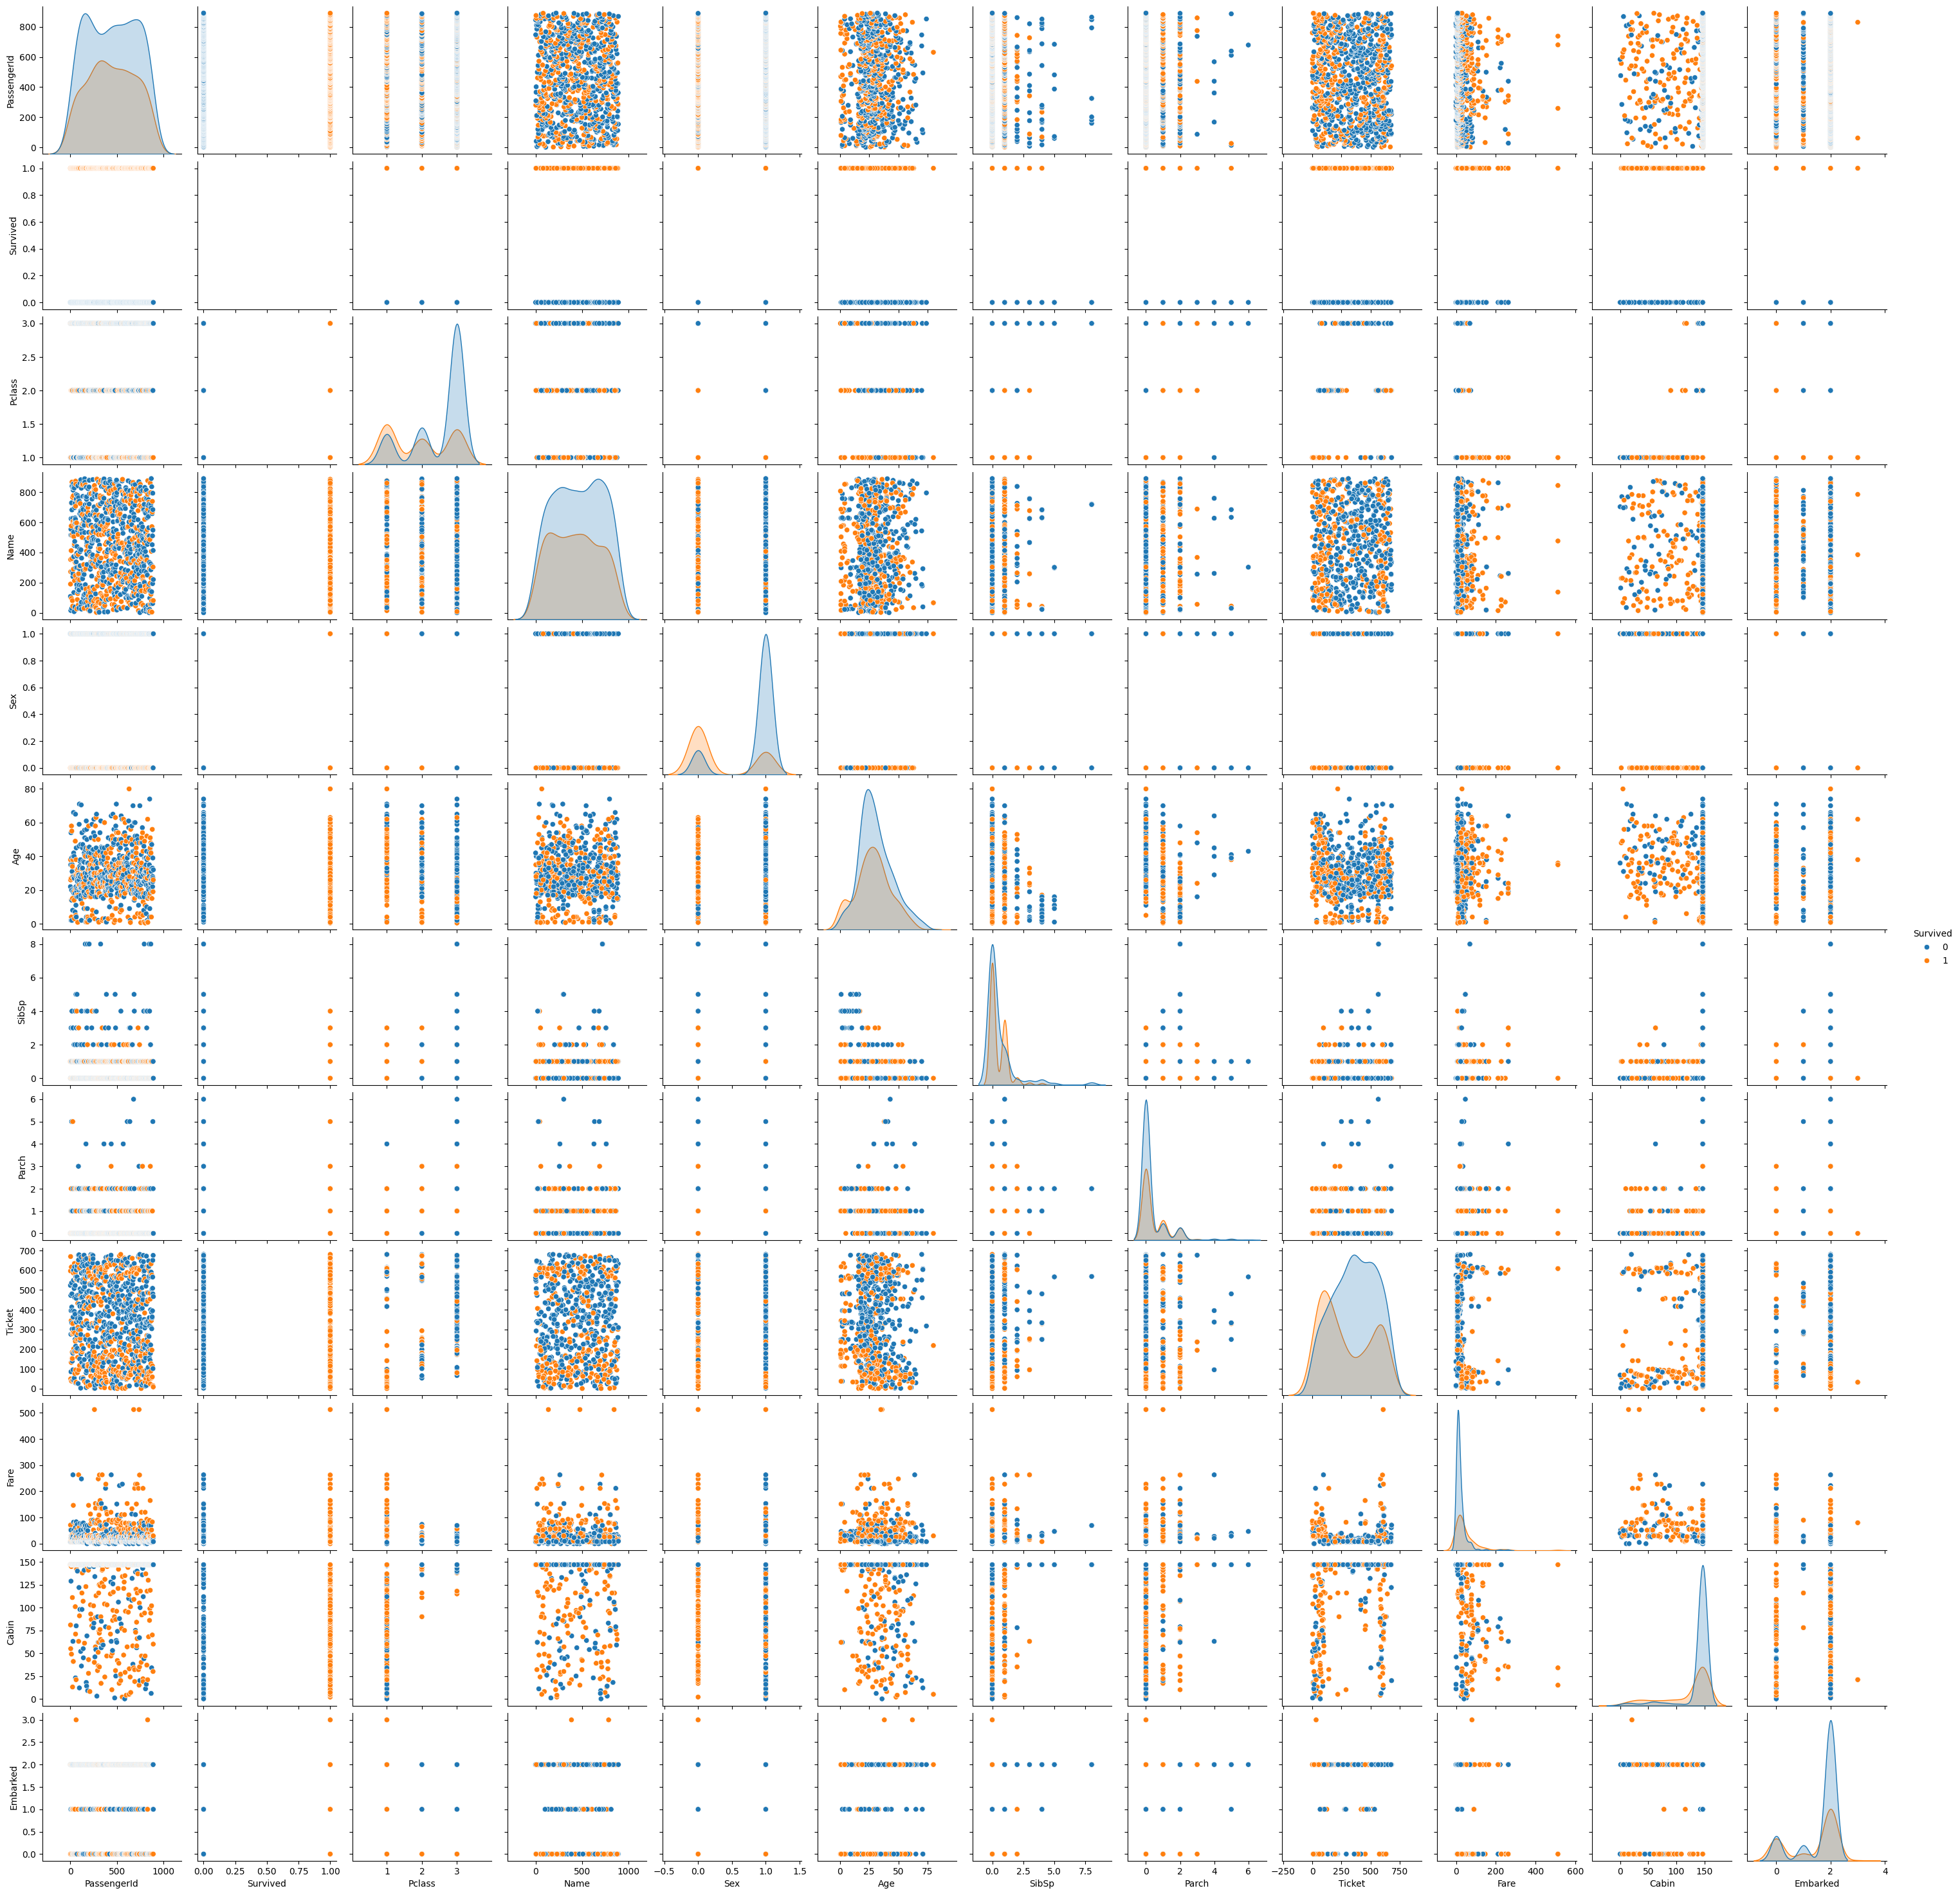

In [21]:
# Pairplot of important features
sns.pairplot(df_train, hue='Survived', vars=['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked'])
plt.show()

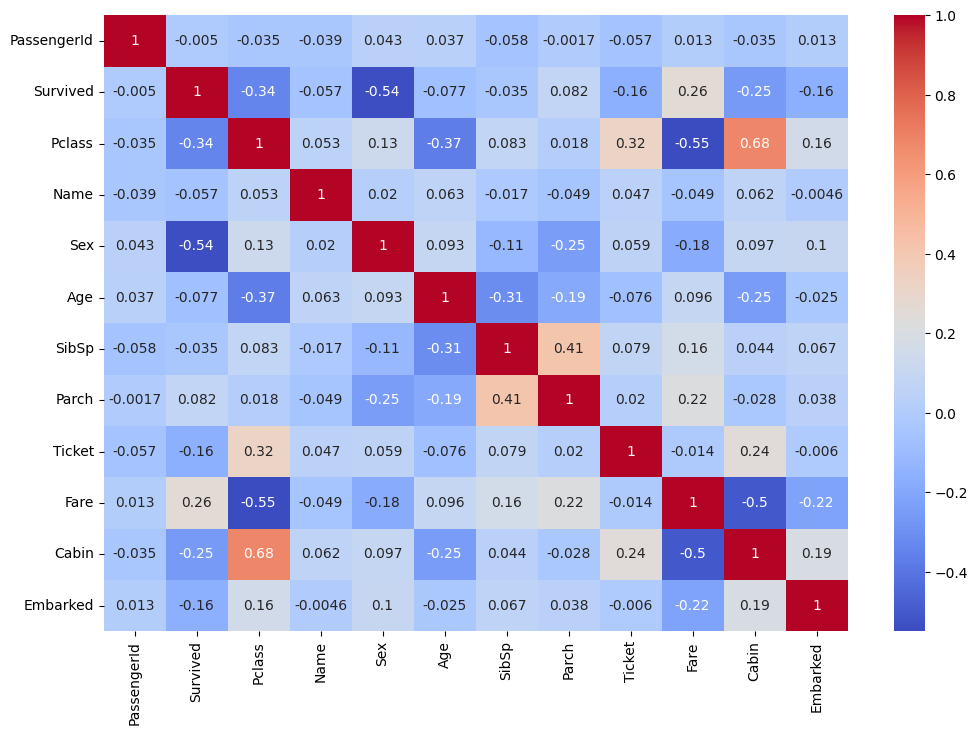

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a correlation matrix
corr_matrix = df_train.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

#**Preprocessing**

In [23]:
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].median())
df_train['Cabin'] = df_train['Cabin'].fillna(df_train['Cabin'].median())
df_train['Embarked'] = df_train['Embarked'].fillna(df_train['Embarked'].median())

In [24]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2


In [25]:
df_train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


"Sweetviz" in google colab allows to do exploratory data analysis on one click.
Run the below cells.
Download and observe html file in your browser.

In [26]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 72.9 MB/s eta 0:00:00


In [27]:
import sweetviz as sv

# Generate the EDA report
report = sv.analyze(df_train)

# Show the report
report.show_html('EDA_Report.html')


                                             |          | [  0%]   00:00 -> (? left)

Report EDA_Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [28]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

In [29]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=25)
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=25)

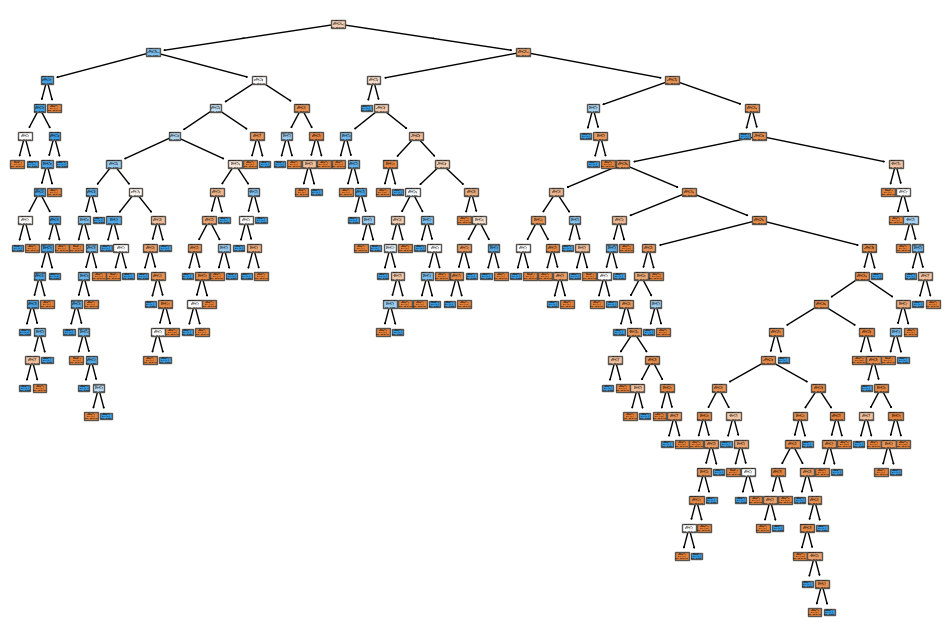

In [30]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12, 8))

# Get feature names from your training data (X_train)
feature_names = X_train.columns.tolist()

# Use feature_names and class names from your actual dataset
tree.plot_tree(clf, filled=True, feature_names=feature_names,
               class_names=['Not Survived', 'Survived']) # Assuming 'Survived' is 0 or 1
plt.show()

# **2. Dealing with Test Dataset**

In [31]:
import pandas as pd

# Load the train.csv file
df_test = pd.read_csv('test.csv')

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [32]:
df_test_target = pd.read_csv('gender_submission.csv')
df_test_target.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


# EDA

In [33]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [34]:
df_test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [35]:
df_test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [36]:
df_test_target.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


# Preprocessing

In [37]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [38]:
df_test_target.isnull().sum()

,0
PassengerId,0
Survived,0


<Axes: xlabel='Survived'>

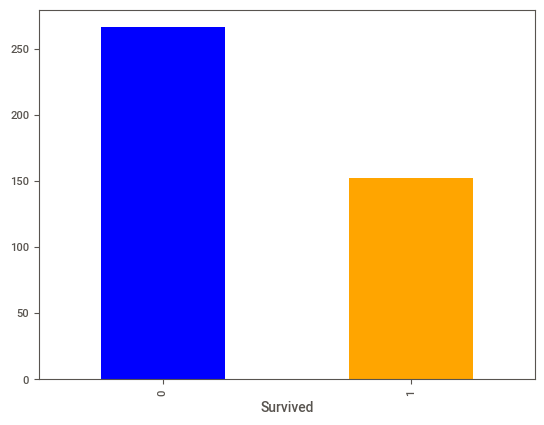

In [39]:

df_test_target['Survived'].value_counts().plot(kind='bar', color=['blue', 'orange'])


In [40]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in df_test.columns:
    if df_test[column].dtype == 'object':  # Check if the column is non-numeric
        # Apply LabelEncoder to the column
        df_test[column] = label_encoder.fit_transform(df_test[column])

# Preview the DataFrame
print(df_test.head())


   PassengerId  Pclass  Name  Sex   Age  SibSp  Parch  Ticket     Fare  Cabin  \
0          892       3   206    1  34.5      0      0     152   7.8292     76   
1          893       3   403    0  47.0      1      0     221   7.0000     76   
2          894       2   269    1  62.0      0      0      73   9.6875     76   
3          895       3   408    1  27.0      0      0     147   8.6625     76   
4          896       3   178    0  22.0      1      1     138  12.2875     76   

   Embarked  
0         1  
1         2  
2         1  
3         2  
4         2  


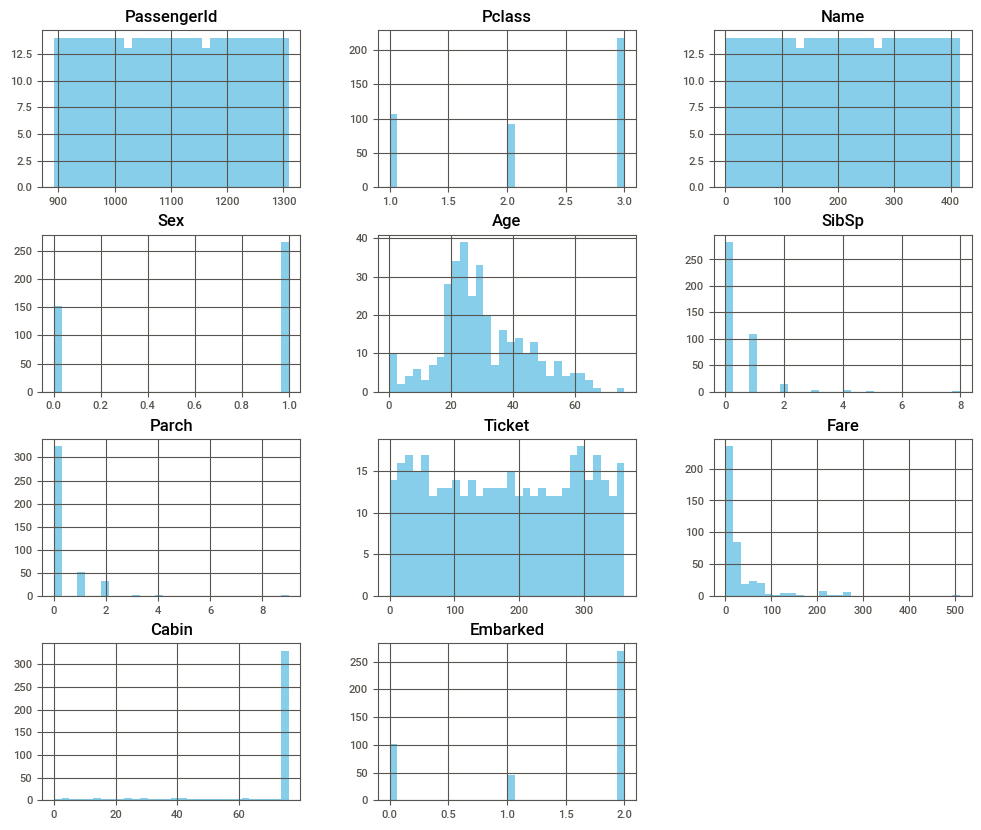

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
# Plot histograms of all features
df_test.hist(figsize=(12, 10), bins=30, color='skyblue')
plt.show()

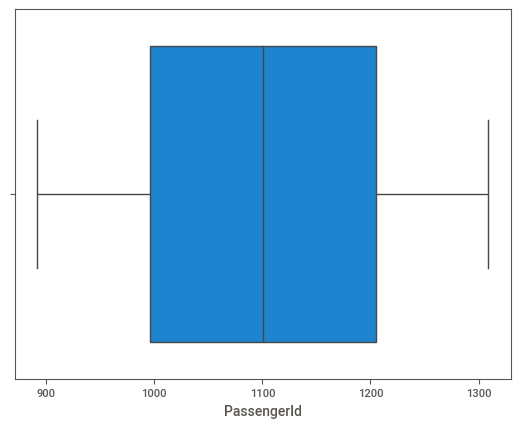

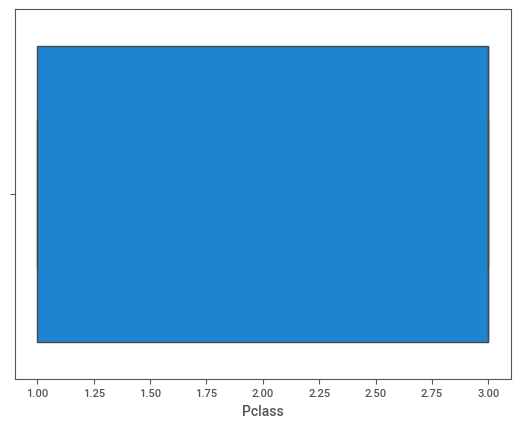

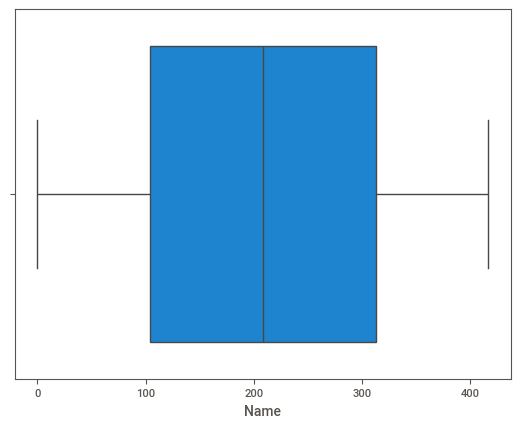

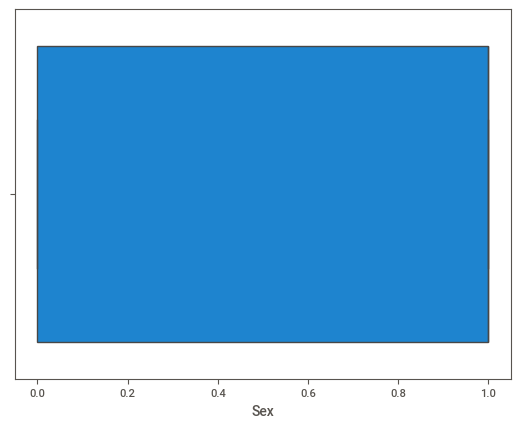

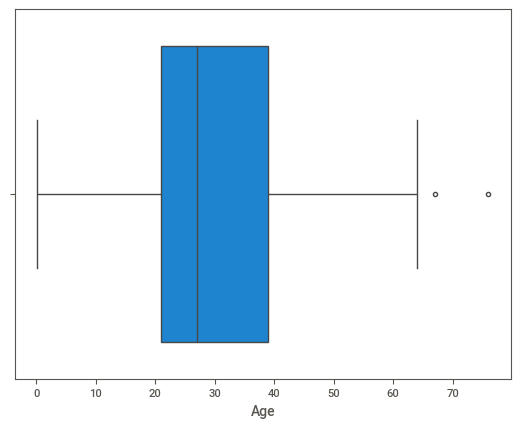

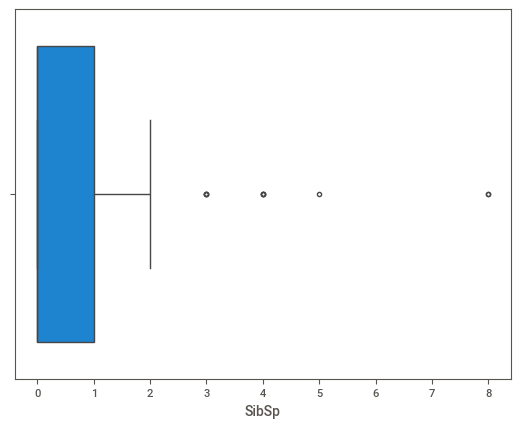

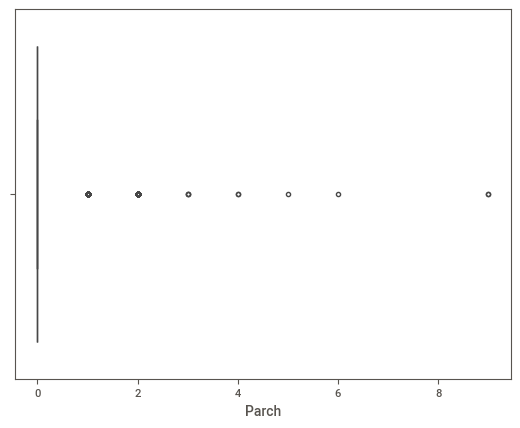

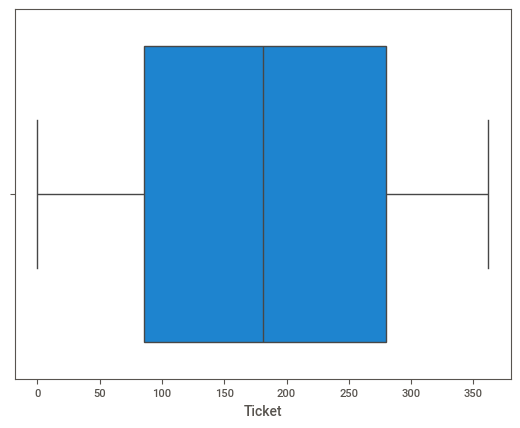

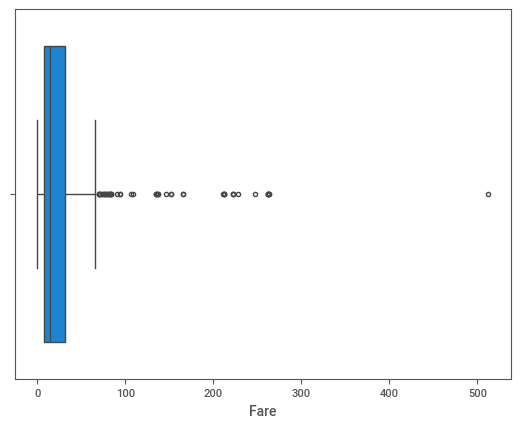

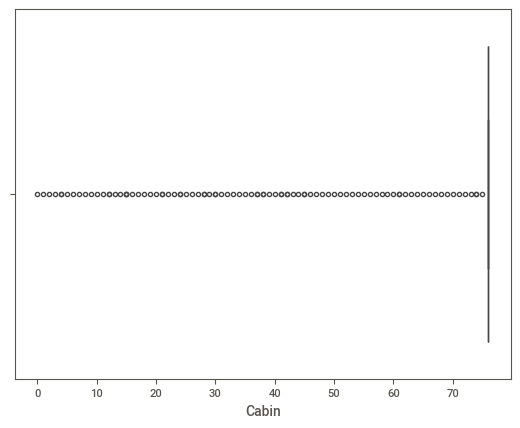

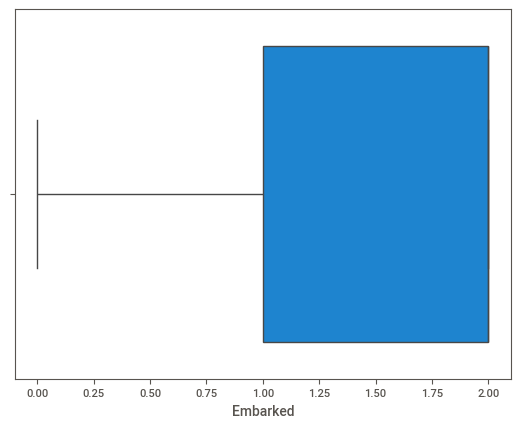

In [42]:
sns.boxplot(x='PassengerId', data=df_test)
plt.show()
sns.boxplot(x='Pclass', data=df_test)
plt.show()
sns.boxplot(x='Name', data=df_test)
plt.show()
sns.boxplot(x='Sex', data=df_test)
plt.show()
sns.boxplot(x='Age', data=df_test)
plt.show()
sns.boxplot(x='SibSp', data=df_test)
plt.show()
sns.boxplot(x='Parch', data=df_test)
plt.show()
sns.boxplot(x='Ticket', data=df_test)
plt.show()
sns.boxplot(x='Fare', data=df_test)
plt.show()
sns.boxplot(x='Cabin', data=df_test)
plt.show()
sns.boxplot(x='Embarked', data=df_test)
plt.show()

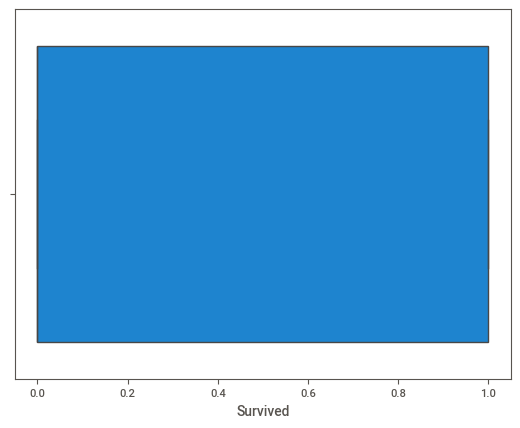

In [43]:
sns.boxplot(x='Survived', data=df_test_target)
plt.show()

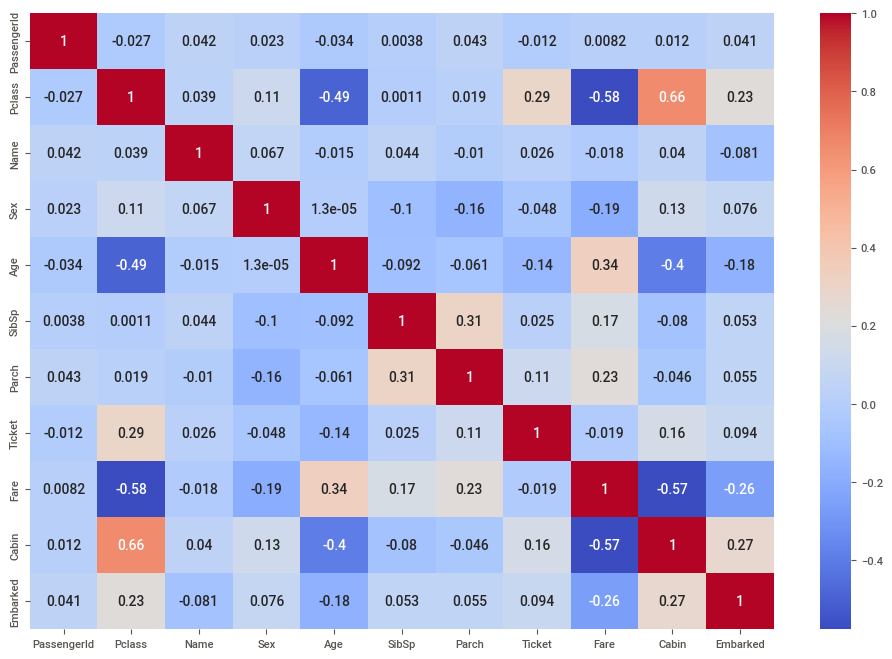

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
# Generate a correlation matrix
corr_matrix = df_test.corr()
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Preprocessing

In [45]:
df_test['Age'] = df_test['Age'].fillna(df_test['Age'].median())
df_test['Cabin'] = df_test['Cabin'].fillna(df_test['Cabin'].median())
df_test['Embarked'] = df_test['Embarked'].fillna(df_test['Embarked'].median())
df_test['Fare'] = df_test['Fare'].fillna(df_test['Fare'].median())

In [46]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0
Cabin,0


In [47]:
print(df_test.shape)

(418, 11)


In [48]:
print(df_test_target.shape)

(418, 2)


In [49]:
X_test = df_test
y_test = df_test_target['Survived']

#**3. Trying different Models for a good ACCuracy**

In [50]:
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 56.94%
Confusion Matrix:
[[137 129]
 [ 51 101]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.52      0.60       266
           1       0.44      0.66      0.53       152

    accuracy                           0.57       418
   macro avg       0.58      0.59      0.57       418
weighted avg       0.62      0.57      0.58       418



In [51]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=25,class_weight='balanced')
# Train the model
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=25)

In [52]:
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 48.33%
Confusion Matrix:
[[ 92 174]
 [ 42 110]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.35      0.46       266
           1       0.39      0.72      0.50       152

    accuracy                           0.48       418
   macro avg       0.54      0.53      0.48       418
weighted avg       0.58      0.48      0.48       418



In [53]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=40)
# Train the model
clf.fit(X_train, y_train)
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 58.37%
Confusion Matrix:
[[144 122]
 [ 52 100]]
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.54      0.62       266
           1       0.45      0.66      0.53       152

    accuracy                           0.58       418
   macro avg       0.59      0.60      0.58       418
weighted avg       0.63      0.58      0.59       418



In [54]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=60)
# Train the model
clf.fit(X_train, y_train)
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 58.13%
Confusion Matrix:
[[140 126]
 [ 49 103]]
Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.53      0.62       266
           1       0.45      0.68      0.54       152

    accuracy                           0.58       418
   macro avg       0.60      0.60      0.58       418
weighted avg       0.63      0.58      0.59       418



In [55]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=30)
# Train the model
clf.fit(X_train, y_train)
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 55.74%
Confusion Matrix:
[[140 126]
 [ 59  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.53      0.60       266
           1       0.42      0.61      0.50       152

    accuracy                           0.56       418
   macro avg       0.56      0.57      0.55       418
weighted avg       0.60      0.56      0.57       418



In [56]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 39.47%
Confusion Matrix:
[[ 54 212]
 [ 41 111]]
Classification Report:
              precision    recall  f1-score   support

           0       0.57      0.20      0.30       266
           1       0.34      0.73      0.47       152

    accuracy                           0.39       418
   macro avg       0.46      0.47      0.38       418
weighted avg       0.49      0.39      0.36       418



In [57]:
# Initialize the model
clf = DecisionTreeClassifier(max_depth=10)
# Train the model
clf.fit(X_train, y_train)
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 56.70%
Confusion Matrix:
[[144 122]
 [ 59  93]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.54      0.61       266
           1       0.43      0.61      0.51       152

    accuracy                           0.57       418
   macro avg       0.57      0.58      0.56       418
weighted avg       0.61      0.57      0.58       418



After doing EDA and testing many models, I am now going for different approaches from preprocessing process. For now, I am skipping the EDA process. It has already been done above.

In [58]:
df_train =pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test_target = pd.read_csv('gender_submission.csv')

In [59]:
df_train['Age'] = df_train['Age'].dropna
df_train['Cabin'] = df_train['Cabin'].dropna
df_train['Embarked'] = df_train['Embarked'].dropna

In [60]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [61]:
df_test_target.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [62]:
df_test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [63]:
# Merge df_test with df_test_target on 'PassengerId'
df_test = pd.merge(df_test, df_test_target, on='PassengerId')

# Check the merged dataframe
print(df_test.head())

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  Survived  
0  34.5      0      0   330911   7.8292   NaN        Q         0  
1  47.0      1      0   363272   7.0000   NaN        S         1  
2  62.0      0      0   240276   9.6875   NaN        Q         0  
3  27.0      0      0   315154   8.6625   NaN        S         0  
4  22.0      1      1  3101298  12.2875   NaN        S         1  


In [64]:
df_train['Age'] = df_train['Age'].dropna
df_train['Cabin'] = df_train['Cabin'].dropna
df_train['Fare'] = df_train['Fare'].dropna
df_train['Embarked'] = df_train['Embarked'].dropna
df_test['Age'] = df_test['Age'].dropna
df_test['Cabin'] = df_train['Cabin'].dropna
df_test['Fare'] = df_train['Fare'].dropna

In [65]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in df_train.columns:
    if df_train[column].dtype == 'object':  # Check if the column is non-numeric
        # Apply LabelEncoder to the column
        df_train[column] = label_encoder.fit_transform(df_train[column])

# Preview the DataFrame
print(df_train.head())


   PassengerId  Survived  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
0            1         0       3   108    1    0      1      0     523     0   
1            2         1       1   190    0    0      1      0     596     0   
2            3         1       3   353    0    0      0      0     669     0   
3            4         1       1   272    0    0      1      0      49     0   
4            5         0       3    15    1    0      0      0     472     0   

   Cabin  Embarked  
0      0         0  
1      0         0  
2      0         0  
3      0         0  
4      0         0  


In [66]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Loop through each column in the DataFrame
for column in df_test.columns:
    if df_test[column].dtype == 'object':  # Check if the column is non-numeric
        # Apply LabelEncoder to the column
        df_test[column] = label_encoder.fit_transform(df_test[column])

# Preview the DataFrame
print(df_test.head())


   PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
0          892       3   206    1    0      0      0     152     0      0   
1          893       3   403    0    0      1      0     221     0      0   
2          894       2   269    1    0      0      0      73     0      0   
3          895       3   408    1    0      0      0     147     0      0   
4          896       3   178    0    0      1      1     138     0      0   

   Embarked  Survived  
0         1         0  
1         2         1  
2         1         0  
3         2         0  
4         2         1  


In [67]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

In [68]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt
# Initialize the model
clf = DecisionTreeClassifier(max_depth=25)
# Train the model
clf.fit(X_train, y_train)
# Import the necessary function
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Make predictions
y_pred = clf.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 68.66%
Confusion Matrix:
[[171  95]
 [ 36 116]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.64      0.72       266
           1       0.55      0.76      0.64       152

    accuracy                           0.69       418
   macro avg       0.69      0.70      0.68       418
weighted avg       0.73      0.69      0.69       418



In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 76.56%
Confusion Matrix:
[[193  73]
 [ 25 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       266
           1       0.64      0.84      0.72       152

    accuracy                           0.77       418
   macro avg       0.76      0.78      0.76       418
weighted avg       0.79      0.77      0.77       418



In [70]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid with ccp_alpha for pruning
param_grid = {
    'max_depth': [10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2]  # Adding cost complexity pruning
}

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'ccp_alpha': 0.0, 'max_depth': 10, 'min_samples_leaf': 5, 'min_samples_split': 2}
Accuracy: 76.56%
Confusion Matrix:
[[193  73]
 [ 25 127]]
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.73      0.80       266
           1       0.64      0.84      0.72       152

    accuracy                           0.77       418
   macro avg       0.76      0.78      0.76       418
weighted avg       0.79      0.77      0.77       418



In [20]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter distribution with additional parameters
param_dist = {
    'max_depth': [10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'ccp_alpha': [0.0, 0.01, 0.1, 0.2],  # Cost complexity pruning
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

# Initialize the Decision Tree model
clf = DecisionTreeClassifier(random_state=42)

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=clf, param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Parameters: {'min_samples_split': 20, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 15, 'criterion': 'gini', 'class_weight': None, 'ccp_alpha': 0.01}
Accuracy: 82.78%
Confusion Matrix:
[[266   0]
 [ 72  80]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       266
           1       1.00      0.53      0.69       152

    accuracy                           0.83       418
   macro avg       0.89      0.76      0.79       418
weighted avg       0.86      0.83      0.81       418



/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
57 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

# Analyzing which group model fails to predict correctly

In [77]:
print(X_train.head())

   PassengerId  Pclass  Name  Sex  Age  SibSp  Parch  Ticket  Fare  Cabin  \
0            1       3   108    1    0      1      0     523     0      0   
1            2       1   190    0    0      1      0     596     0      0   
2            3       3   353    0    0      0      0     669     0      0   
3            4       1   272    0    0      1      0      49     0      0   
4            5       3    15    1    0      0      0     472     0      0   

   Embarked   Group  
0         0  Female  
1         0    Male  
2         0    Male  
3         0    Male  
4         0  Female  


In [79]:
X_train = df_train.drop('Survived', axis=1)
y_train = df_train['Survived']

X_test = df_test.drop('Survived', axis=1)
y_test = df_test['Survived']

import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'max_features': ['log2'],
    'criterion': ['gini'],
    'class_weight': [None],
    'ccp_alpha': [0.01]
}

# Initialize the model
clf = DecisionTreeClassifier(random_state=42)

# Apply GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Check the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Print the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Add predictions to the test DataFrame for analysis
test_df = X_test.copy()
test_df['True_Label'] = y_test
test_df['Predicted_Label'] = y_pred

# Assuming df has columns 'Sex' and 'Age', add these columns to test_df
test_df['Sex'] = df_test.loc[X_test.index, 'Sex']
test_df['Age'] = df_test.loc[X_test.index, 'Age']

# Filter groups based on the specified criteria
# Group 1: Female (Sex = 0) and Age > 15
group_female_above_15 = test_df[(test_df['Sex'] == 0) & (test_df['Age'] > 15)]
# Group 2: Male (Sex = 1) and Age > 15
group_male_above_15 = test_df[(test_df['Sex'] == 1) & (test_df['Age'] > 15)]
# Group 3: Age < 15 (both sexes)
group_children = test_df[test_df['Age'] < 15]

# Function to calculate incorrect predictions and their proportion
def analyze_group(group, label):
    total = len(group)
    incorrect = group[group['True_Label'] != group['Predicted_Label']]
    incorrect_count = len(incorrect)
    proportion = incorrect_count / total if total > 0 else 0
    print(f"{label} - Total: {total}, Incorrect: {incorrect_count}, Proportion: {proportion:.2f}")

# Analyze the groups
analyze_group(group_female_above_15, "Females > 15")
analyze_group(group_male_above_15, "Males > 15")
analyze_group(group_children, "Children < 15")


Best Parameters: {'ccp_alpha': 0.01, 'class_weight': None, 'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 10, 'min_samples_split': 2}
Accuracy: 99.28%
Confusion Matrix:
[[266   0]
 [  3 149]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       266
           1       1.00      0.98      0.99       152

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418

Females > 15 - Total: 0, Incorrect: 0, Proportion: 0.00
Males > 15 - Total: 0, Incorrect: 0, Proportion: 0.00
Children < 15 - Total: 418, Incorrect: 3, Proportion: 0.01


### Mini Challenge Overview

In this mini challenge, I focussed on downloading a dataset from Kaggle, performing exploratory data analysis (EDA), and applying machine learning models to predict survival on the Titanic dataset.

---

#### Steps to Complete the Challenge

1. **Downloading the Dataset**
   - Access your Kaggle account and create an API token.
   - Download the `kaggle.json` file containing your credentials.
   - Upload the `kaggle.json` file to the Colab environment.
   - Use the Kaggle API to download the Titanic dataset and unzip it for further analysis.

2. **Dealing with the Training Dataset**
   - Load the training data from the `train.csv` file into a DataFrame.
   - Perform an initial data preview using `.head()` to understand the structure.
   - Conduct EDA by checking data types, summarizing statistics, and identifying missing values.
   - Visualize survival counts and explore categorical variables using plots.
   - Use Label Encoding to convert categorical features into numeric format for model compatibility.
   - Generate visualizations, including histograms, boxplots, pair plots, and correlation matrices to gain deeper insights.

3. **Data Preprocessing**
   - Handle missing values in the 'Age', 'Cabin', and 'Embarked' columns by filling with appropriate statistics (e.g., median).
   - Optionally use the Sweetviz library for an automated EDA report.
   - Prepare the feature matrix (X) and target vector (y) for model training.

4. **Model Training**
   - Initialize a Decision Tree classifier and fit it to the training data.
   - Visualize the decision tree to understand feature importance.
   - Load and preprocess the test dataset, merging it with the target variable for evaluation.
   - Perform a similar EDA process on the test dataset.

5. **Model Evaluation**
   - Use accuracy, confusion matrix, and classification reports to evaluate model performance.
   - Experiment with different hyperparameters of the Decision Tree model to optimize accuracy using techniques like Grid Search and Randomized Search.

6. **Model Analysis**
   - Analyze which groups the model fails to predict accurately.
   - Create a comprehensive DataFrame to compare true labels against predicted labels, helping identify patterns and areas for improvement.

